## Observations and Insights 

In [110]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = mouse_metadata.merge(study_results, on=("Mouse ID"))

# Display the data table for preview
mouse_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [111]:
# Checking the number of mice.
mouse_results["Mouse ID"].nunique()


249

In [112]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = mouse_results.loc[mouse_results.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate

array(['g989'], dtype=object)

In [113]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_results.loc[(mouse_results["Mouse ID"] == "g989")]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [114]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean = mouse_results.drop(mouse_results.index[[908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920]])
mouse_clean = mouse_clean.reset_index()
mouse_clean

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1875,1888,z969,Naftisol,Male,9,30,25,63.145652,2
1876,1889,z969,Naftisol,Male,9,30,30,65.841013,3
1877,1890,z969,Naftisol,Male,9,30,35,69.176246,4
1878,1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [115]:
# Checking the number of mice in the clean DataFrame.
mouse_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [116]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe. 
mouse_statistics = {
    "Mean": mouse_clean.groupby(by=["Drug Regimen"])["Tumor Volume (mm3)"].mean(),
    "Median": mouse_clean.groupby(by=["Drug Regimen"])["Tumor Volume (mm3)"].median(),
    "Variance": mouse_clean.groupby(by=["Drug Regimen"])["Tumor Volume (mm3)"].var(),
    "St. Dev": mouse_clean.groupby(by=["Drug Regimen"])["Tumor Volume (mm3)"].std(),
    "St. Error": mouse_clean.groupby(by=["Drug Regimen"])["Tumor Volume (mm3)"].sem()
}
mouse_statistics_df = pd.DataFrame(data = mouse_statistics)
mouse_statistics_df.round(2)


,Mean,Median,Variance,St. Dev,St. Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Timepoints Tested by Drug'}, xlabel='Drug Regimen', ylabel='Number of Timepoints'>

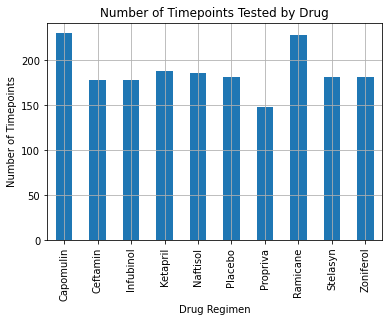

In [117]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoint_plot = mouse_clean.groupby(by=["Drug Regimen"])["Timepoint"].count()


timepoint_plot.plot(kind="bar", xlabel= "Drug Regimen", ylabel= "Number of Timepoints", grid=True, title = "Number of Timepoints Tested by Drug")


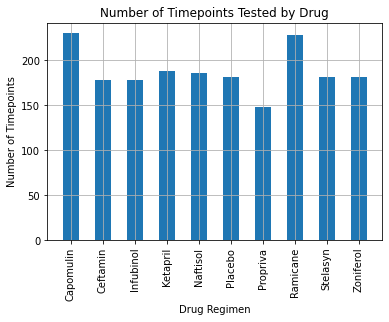

In [118]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
from matplotlib.pyplot import xlabel


x = sorted(mouse_clean["Drug Regimen"].unique())
y = timepoint_plot.values

plt.bar(x, y, width= 0.5)
plt.title("Number of Timepoints Tested by Drug")
plt.grid(True)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.show()

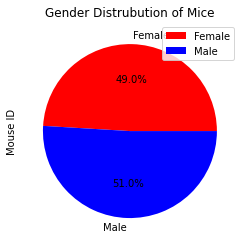

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = mouse_clean.groupby(["Sex"]).count()
mice_gender.plot.pie(autopct= "%1.1f%%", colors = ["red", "blue"], y="Mouse ID", title="Gender Distrubution of Mice", figsize=(6,4))
plt.show()



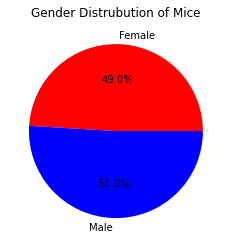

In [120]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0,0)
colors = ["red", "blue"]
sex = ["Female", "Male"]
distrubution = ["922", "958"]

plt.pie(distrubution, explode=explode, labels=sex, colors=colors, autopct="%1.1f%%")
plt.title("Gender Distrubution of Mice")

plt.show()

## Quartiles, Outliers and Boxplots

In [121]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = mouse_clean.loc[mouse_clean["Drug Regimen"] == "Capomulin",:]
ramicane_df = mouse_clean.loc[mouse_clean["Drug Regimen"] == "Ramicane", :]
infubinol_df = mouse_clean.loc[mouse_clean["Drug Regimen"] == "Infubinol", :]
ceftamin_df = mouse_clean.loc[mouse_clean["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
tumor_max = (mouse_clean.groupby("Mouse ID")["Timepoint"].max())
tumor_max = pd.DataFrame(tumor_max)
tumor_max = tumor_max.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_max_merged = pd.merge(tumor_max, mouse_clean, on = ("Mouse ID", "Timepoint"))

tumor_max_merged




,Mouse ID,Timepoint,index,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,463,Infubinol,Female,20,23,67.973419,2
1,a251,45,473,Infubinol,Female,21,25,65.525743,1
2,a262,45,483,Placebo,Female,17,29,70.717621,4
3,a275,45,493,Ceftamin,Female,20,28,62.999356,3
4,a366,30,500,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...,...
243,z435,10,1862,Propriva,Female,12,26,48.710661,0
244,z578,45,84,Ramicane,Male,11,16,30.638696,0
245,z581,45,1872,Infubinol,Female,24,25,62.754451,3
246,z795,45,1882,Naftisol,Female,13,29,65.741070,3


In [122]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Capomulin=[]
Ramicane=[]
Infubinol=[]
Ceftamin=[]

# Create a for loop to fill the empty lists with data

for index, row in tumor_max_merged.iterrows():
        if row["Drug Regimen"] == treatments[0]:
            Capomulin.append(row["Tumor Volume (mm3)"])
        if row["Drug Regimen"] == treatments[1]:
            Ramicane.append(row["Tumor Volume (mm3)"])
        if row["Drug Regimen"] == treatments[2]:
            Infubinol.append(row["Tumor Volume (mm3)"])
        if row["Drug Regimen"] == treatments[3]:
            Ceftamin.append(row["Tumor Volume (mm3)"])


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes
final_volumes = pd.DataFrame({"Capomulin": Capomulin, "Ramicane": Ramicane, "Infubinol": Infubinol, 
                        "Ceftamin": Ceftamin}).round(2)
    
final_volumes
    

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.98,38.41,67.97,63.00
1,38.94,43.05,65.53,45.00
2,30.49,38.81,57.03,56.06
3,37.07,32.98,66.08,55.74
4,40.16,38.34,72.23,48.72
5,47.69,33.40,36.32,47.78
6,37.31,37.31,60.97,61.85
7,38.13,40.66,62.44,68.92
8,38.75,29.13,60.92,67.75
9,41.48,33.56,67.29,57.92


In [123]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

def find_outliers_iqr(final_volumes):

   q1=final_volumes.quantile(0.25)

   q3=final_volumes.quantile(0.75)

   IQR=q3-q1

   outliers = final_volumes[((final_volumes<(q1-1.5*IQR)) | (final_volumes>(q3+1.5*IQR)))]
    
   return outliers

outliers = find_outliers_iqr(final_volumes[["Capomulin","Ramicane","Infubinol","Ceftamin"]])
outliers=outliers.dropna(how='all')
outliers

,Capomulin,Ramicane,Infubinol,Ceftamin
5,NaN,NaN,36.32,NaN


In [124]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [final_volumes["Capomulin"],
        final_volumes["Ramicane"],
        final_volumes["Infubinol"],
        final_volumes["Ceftamin"]]

lq_data=[]
mq_data=[]
uq_data=[]
iqr_data=[]
lb_data=[]
ub_data=[]

for drug in data:
    quartiles = drug.quantile([.25,.5,.75])
    lq = quartiles[0.25]
    uq = quartiles[0.75]
    mq = quartiles[0.5]
    iqr = uq-lq
    lb = lq - (1.5*iqr)
    ub = uq + (1.5*iqr)
    lq_data.append(lq)
    mq_data.append(mq)
    uq_data.append(uq)
    iqr_data.append(iqr)
    lb_data.append(lb)
    ub_data.append(ub)

index_list=["Capomulin","Ramicane","Infubinol","Ceftamin"]

quartiles_data = pd.DataFrame({"Lower Quartile": lq_data, "Median":mq_data, "Upper Quartile": uq_data, 
                        "IQR": iqr_data, "Lower Bound":lb_data, "Upper Bound":ub_data,}, index=index_list)
quartiles_data

,Lower Quartile,Median,Upper Quartile,IQR,Lower Bound,Upper Bound
Capomulin,32.38,38.13,40.16,7.78,20.71,51.83
Ramicane,31.56,36.56,40.66,9.10,17.91,54.31
Infubinol,54.05,60.17,65.53,11.48,36.83,82.75
Ceftamin,48.72,59.85,64.30,15.58,25.35,87.67


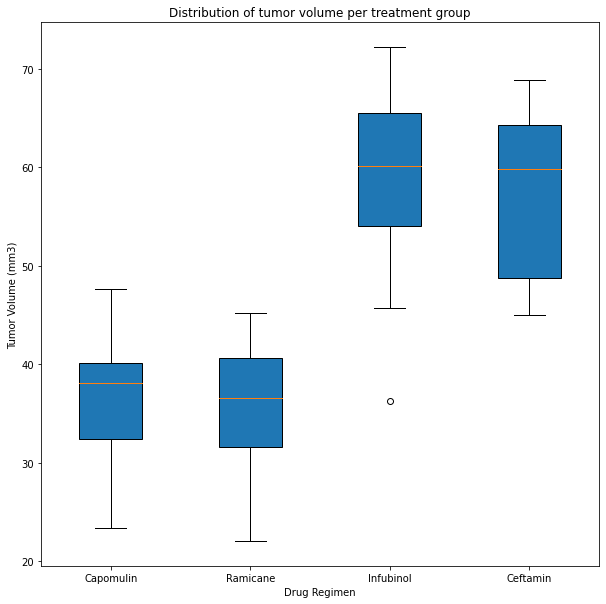

In [125]:
data = [final_volumes["Capomulin"],
        final_volumes["Ramicane"],
        final_volumes["Infubinol"],
        final_volumes["Ceftamin"]]

fig1,bxplot = plt.subplots (figsize=(10, 10))
bxplot.boxplot(data, labels=treatments, patch_artist=True)
bxplot.set_title("Distribution of tumor volume per treatment group")
bxplot.set_ylabel("Tumor Volume (mm3)")
bxplot.set_xlabel("Drug Regimen")
plt.show()


## Line and Scatter Plots

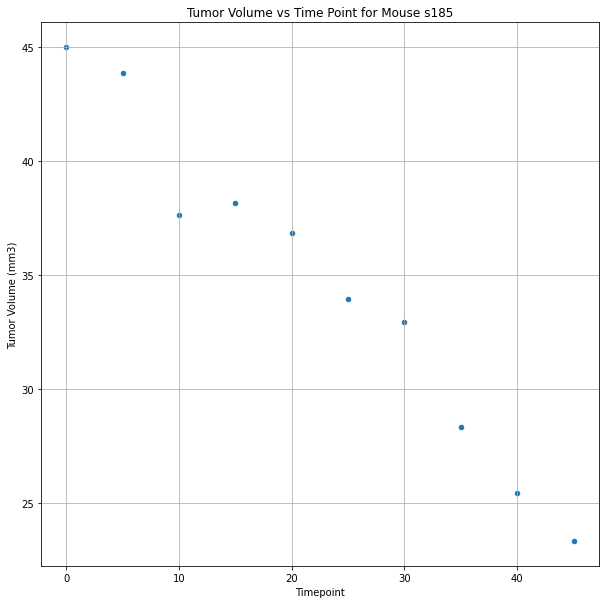

In [126]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_sample = mouse_clean.loc[(mouse_clean["Drug Regimen"]=="Capomulin") & (mouse_clean["Mouse ID"]=="s185")]

mouse_sample.plot(kind="scatter", x="Timepoint", y="Tumor Volume (mm3)", grid=True, figsize=(10,10), 
                  title="Tumor Volume vs Time Point for Mouse s185")
plt.show()

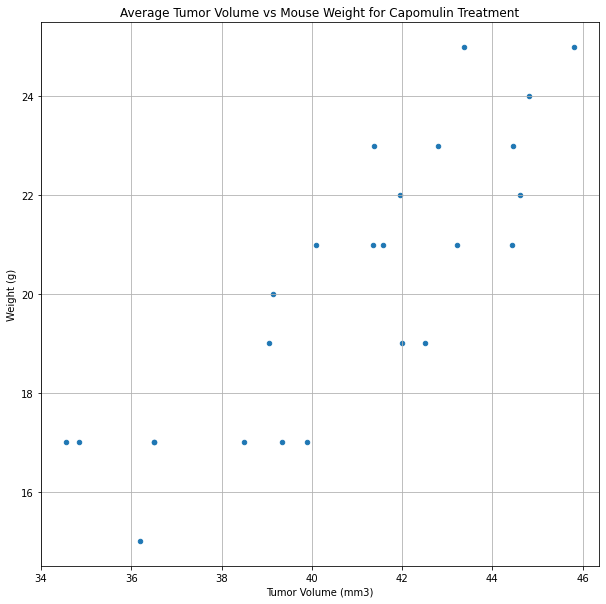

In [127]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_avg = mouse_clean.loc[mouse_clean['Drug Regimen'] == "Capomulin"].groupby("Mouse ID").mean()

capomulin_avg.plot(kind="scatter", x="Tumor Volume (mm3)", y="Weight (g)", grid=True, figsize=(10,10), 
                  title="Average Tumor Volume vs Mouse Weight for Capomulin Treatment")
plt.show()

## Correlation and Regression

In [128]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_data = capomulin_avg["Tumor Volume (mm3)"]
y_data = capomulin_avg["Weight (g)"]
correlation = st.pearsonr(x_data,y_data)
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84


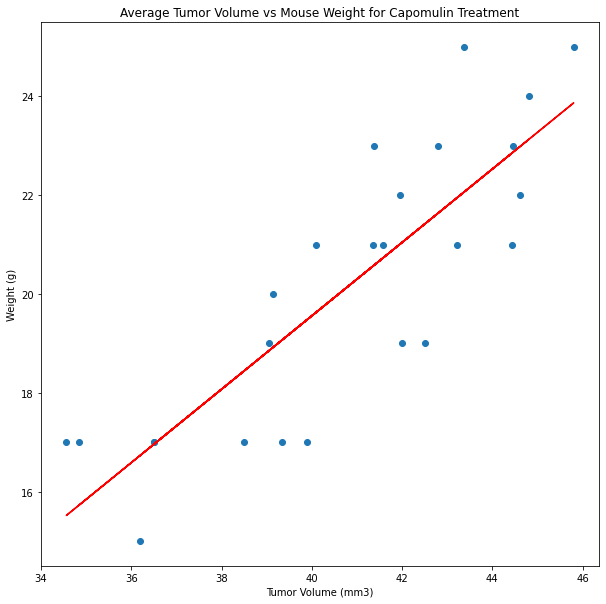

In [130]:
sc, ax1 = plt.subplots(figsize=(10, 10))
x_data = capomulin_avg["Tumor Volume (mm3)"]
y_data = capomulin_avg["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_data,y_data)
plt.plot(x_data,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.title("Average Tumor Volume vs Mouse Weight for Capomulin Treatment")
plt.show()